# Decision Tree Classifier

In [40]:
# import librarires 
import numpy as np
import pandas as pd

#import data visuvalize
import matplotlib.pyplot as plt
import seaborn as sb
#%matplotlib inline

In [41]:
pima = pd.read_csv("diabetes.csv")

In [42]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [43]:
pima.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [44]:

# load dataset
#pima = pd.read_csv("diabetes.csv")
pima.columns = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

In [45]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [46]:
pima.shape

(768, 9)

In [47]:
pima=pima.iloc[:20,:]

In [48]:
pima

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [49]:
pima.shape

(20, 9)

In [50]:
pima.isnull().sum() # data cleaning

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

In [51]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  20 non-null     int64  
 1   glucose   20 non-null     int64  
 2   bp        20 non-null     int64  
 3   skin      20 non-null     int64  
 4   insulin   20 non-null     int64  
 5   bmi       20 non-null     float64
 6   pedigree  20 non-null     float64
 7   age       20 non-null     int64  
 8   label     20 non-null     int64  
dtypes: float64(2), int64(7)
memory usage: 1.5 KB


In [52]:
pima.corr()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
pregnant,1.000000,0.181410,-0.058186,-0.806660,-0.486759,-0.386041,-0.039599,0.182946,-0.015099
glucose,0.181410,1.000000,0.219686,0.016168,0.553790,-0.072565,0.209934,0.667874,0.452664
bp,-0.058186,0.219686,1.000000,0.008259,0.036305,-0.314031,-0.041423,0.308379,0.098262
skin,-0.806660,0.016168,0.008259,1.000000,0.461601,0.450973,0.103832,0.043219,0.209843
insulin,-0.486759,0.553790,0.036305,0.461601,1.000000,0.118807,-0.023130,0.491582,0.316934
bmi,-0.386041,-0.072565,-0.314031,0.450973,0.118807,1.000000,0.236690,-0.383225,-0.077424
pedigree,-0.039599,0.209934,-0.041423,0.103832,-0.023130,0.236690,1.000000,0.174482,0.191270
age,0.182946,0.667874,0.308379,0.043219,0.491582,-0.383225,0.174482,1.000000,0.289022
label,-0.015099,0.452664,0.098262,0.209843,0.316934,-0.077424,0.191270,0.289022,1.000000


In [53]:
#X=pima.iloc[:,[1,2,3,4,6,7]]
#y=pima.iloc[:,8]

In [ ]:
# Feature Engineering

In [54]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [55]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1) #

In [56]:
X_train.shape

(18, 7)

In [57]:
X_test.shape

(2, 7)

In [58]:
y_train.shape

(18,)

In [59]:
y_test.shape

(2,)

In [60]:
# Create Decision Tree classifier object
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier( )


In [ ]:
# Train Decision Tree Classifier
clf = clf.fit(X_train,y_train)

In [62]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [63]:
# Model Accuracy, how often is the classifier correct?
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [64]:
confusion_matrix(y_test,y_pred)

array([[1, 0],
       [0, 1]])

In [65]:
#Installation for Graphiz 

In [66]:
pip install graphviz

In [ ]:
pip install pydotplus

### Download Graphiz from this site 

https://www2.graphviz.org/Packages/development/windows/10/cmake/Release/x64/

In [ ]:
# For Windows  graphiz 
import os

os.environ["PATH"] += os.pathsep + 'C:\ \Program Files (x86)\ \Graphviz2.38\ \bin\ \

In [67]:
pima

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


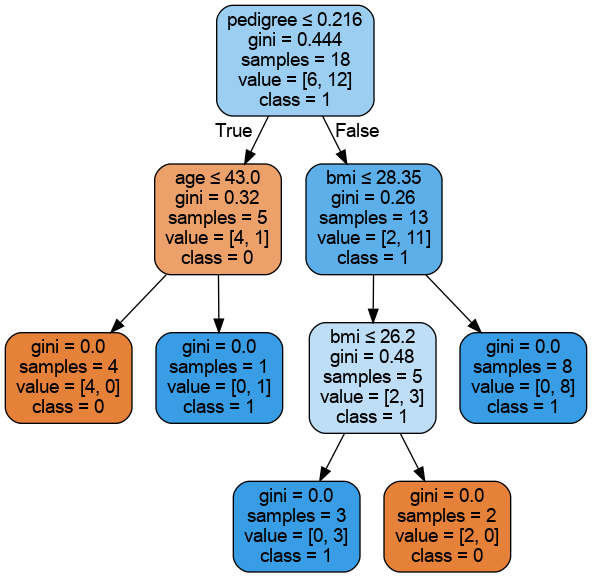

In [68]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [ ]:
from sklearn import tree

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=feature_cols,
                   class_names=['0','1'],
                   filled=True)

In [69]:
pimax=X_train

In [70]:
pimax['label']=y_train

/home/shyam/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [76]:
pimax.shape

(18, 8)

In [77]:
pimax

,pregnant,insulin,bmi,age,glucose,bp,pedigree,label
6,3,88,31.0,26,78,50,0.248,1
10,4,0,37.6,30,110,92,0.191,0
2,8,0,23.3,32,183,64,0.672,1
14,5,175,25.8,51,166,72,0.587,1
4,0,168,43.1,33,137,40,2.288,1
17,7,0,29.6,31,107,74,0.254,1
7,10,0,35.3,29,115,0,0.134,0
1,1,0,26.6,31,85,66,0.351,0
13,1,846,30.1,59,189,60,0.398,1
0,6,0,33.6,50,148,72,0.627,1


In [74]:
pedigree=pimax[pimax['pedigree']<=0.216]

In [78]:
pedigree

,pregnant,insulin,bmi,age,glucose,bp,pedigree,label
10,4,0,37.6,30,110,92,0.191,0
7,10,0,35.3,29,115,0,0.134,0
18,1,83,43.3,33,103,30,0.183,0
8,2,543,30.5,53,197,70,0.158,1
5,5,0,25.6,30,116,74,0.201,0


In [81]:
pedigree[pedigree['age']<=43]

,pregnant,insulin,bmi,age,glucose,bp,pedigree,label
10,4,0,37.6,30,110,92,0.191,0
7,10,0,35.3,29,115,0,0.134,0
18,1,83,43.3,33,103,30,0.183,0
5,5,0,25.6,30,116,74,0.201,0


In [84]:
pgreater=pimax[pimax['pedigree']>=0.216]

In [85]:
pgreater

,pregnant,insulin,bmi,age,glucose,bp,pedigree,label
6,3,88,31.0,26,78,50,0.248,1
2,8,0,23.3,32,183,64,0.672,1
14,5,175,25.8,51,166,72,0.587,1
4,0,168,43.1,33,137,40,2.288,1
17,7,0,29.6,31,107,74,0.254,1
1,1,0,26.6,31,85,66,0.351,0
13,1,846,30.1,59,189,60,0.398,1
0,6,0,33.6,50,148,72,0.627,1
19,1,96,34.6,32,115,70,0.529,1
9,8,0,0.0,54,125,96,0.232,1


In [86]:
pgreater[pgreater['bmi']<=28.35]

,pregnant,insulin,bmi,age,glucose,bp,pedigree,label
2,8,0,23.3,32,183,64,0.672,1
14,5,175,25.8,51,166,72,0.587,1
1,1,0,26.6,31,85,66,0.351,0
9,8,0,0.0,54,125,96,0.232,1
12,10,0,27.1,57,139,80,1.441,0


In [87]:
pgreater[pgreater['bmi']<=26.2]

,pregnant,insulin,bmi,age,glucose,bp,pedigree,label
2,8,0,23.3,32,183,64,0.672,1
14,5,175,25.8,51,166,72,0.587,1
9,8,0,0.0,54,125,96,0.232,1


In [46]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy")

In [47]:
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [48]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 1.0


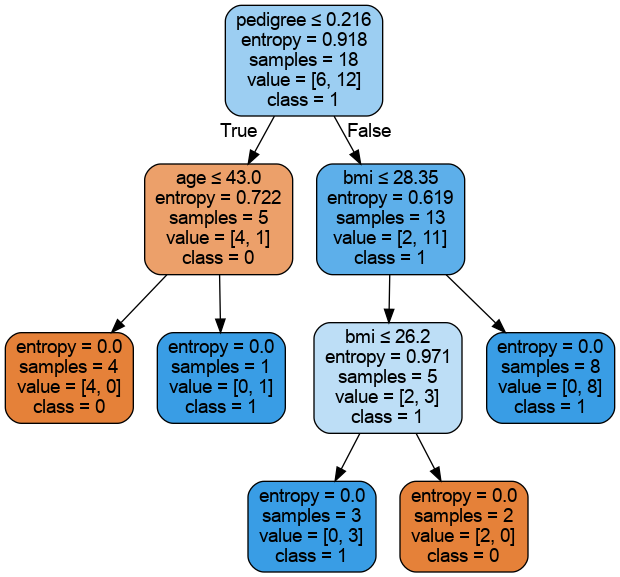

In [49]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())